Import libraries

In [1]:
import pandas as pd
from pmdarima import auto_arima
from metrics import print_evaluation_metrics

Load dataset and prepare df

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)
df = df[[date_column, target_column]]

df.set_index(date_column, inplace=True)
df = df.groupby(date_column).sum().reset_index()

df = df.dropna()

Train test split

In [3]:
train = df.iloc[:-30]
test = df.iloc[-30:]

Parameter tuning for order and seasonal order

In [4]:
stepwise_fit = auto_arima(
    df[target_column],
    trace=True,
    suppress_warnings=True,
    max_P=3,
    max_D=2,
    max_Q=3,
    m=12,
    stepwise=True,
)
best_order = stepwise_fit.order
best_seasonal_order = stepwise_fit.seasonal_order

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=25955.122, Time=12.10 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=26939.808, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=26426.646, Time=1.42 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=26023.173, Time=2.95 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=26937.808, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=25982.838, Time=9.77 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=25832.357, Time=13.21 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=25950.365, Time=1.84 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=25845.650, Time=25.16 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=26361.245, Time=19.70 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=25883.280, Time=6.05 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=26021.839, Time=4.99 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=25775.900, Time=8.59 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=25795.582, Time=1.61 sec
 ARIMA(3,1,2)(2,0,0)[12] intercept   : AIC=2

Create Model

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    train[target_column], order=best_order, seasonal_order=best_seasonal_order
)
model = model.fit()
model.summary()

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17096D+01    |proj g|=  3.64272D+00



At iterate    5    f=  9.65369D+00    |proj g|=  3.76455D-01

At iterate   10    f=  9.38608D+00    |proj g|=  5.52755D-01

At iterate   15    f=  9.30277D+00    |proj g|=  8.24937D-02

At iterate   20    f=  9.29492D+00    |proj g|=  4.37071D-03

At iterate   25    f=  9.29488D+00    |proj g|=  4.27935D-03

At iterate   30    f=  9.29130D+00    |proj g|=  7.18026D-02

At iterate   35    f=  9.08697D+00    |proj g|=  1.00377D-01

At iterate   40    f=  9.03534D+00    |proj g|=  2.75851D-02

At iterate   45    f=  8.98904D+00    |proj g|=  1.74870D-01

At iterate   50    f=  8.97270D+00    |proj g|=  1.23247D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          New_deaths   No. Observations:                 1390
Model:             SARIMAX(4, 1, 2)x(1, 0, [], 12)   Log Likelihood              -12472.057
Date:                             Sat, 09 Dec 2023   AIC                          24960.114
Time:                                     13:53:12   BIC                          25002.004
Sample:                                          0   HQIC                         24975.779
                                            - 1390                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7884      0.023    -33.759      0.000      -0.834      -0.743
ar.L2         -0.0181      0.032     -0.572      0.567      -0.080       0.044
ar.L3         -0.3584      0.031    -11.566      0.000      -0.419      -0.298
ar.L4         -0.6417      0.024    -26.229      0.000      -0.690      -0.594
ma.L1          0.0431      0.022      1.963      0.050     5.9e-05       0.086
ma.L2         -0.5249      0.027    -19.249      0.000      -0.578      -0.471
ar.S.L12      -0.6508      0.018    -36.350      0.000      -0.686      -0.616
sigma2      3.631e+06   6.67e+04     54.437      0.000     3.5e+06    3.76e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):              4033.08
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             1.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Plot the result

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

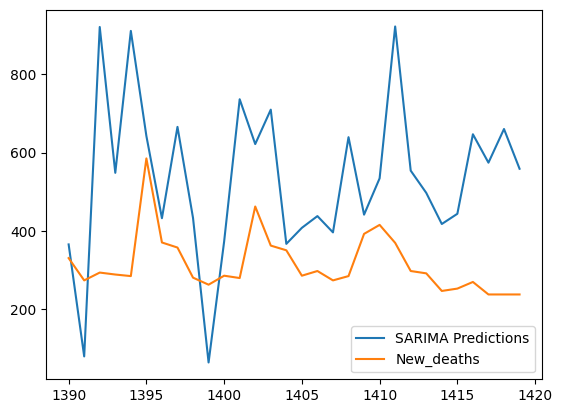

In [6]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ="levels").rename("SARIMA Predictions")
pred.plot(legend=True)
test[target_column].plot(legend=True)

RMSE of the result

In [7]:
print_evaluation_metrics(pred, test[target_column])

Evaluation Metrics:
MSE: 87872.23
RMSE: 296.43
MAE: 244.72
MAPE: 84.41
SMAPE: 57.59
